In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py

In [2]:
# some utility functions

def bandpass_extents(B, lam_c):
    Dlam = B*lam_c/(1+B*0.5)
    lam_min = lam_c - 0.5*Dlam
    lam_max = lam_c + 0.5*Dlam
    return lam_min, lam_max, Dlam

def read_raw(file):
    f = open(file,'r')
    lines = f.readlines()
    f.close()

    out = {}
    keys = ['wv','dwv','albedo','flux_ratio']
    nw = len(lines)-1
    for key in keys:
        out[key] = np.empty(nw)

    for i,line in enumerate(lines[1:]):
        tmp = line.strip().split('|')[1:-1]
        tmp = [a.strip() for a in tmp]

        for j,key in enumerate(keys):
            out[key][i] = float(tmp[j])
    return out

def read_dat(file):
    f = open(file,'r')
    lines = f.readlines()
    f.close()

    out = {}
    keys = ['wv','dwv','albedo','flux_ratio','data','uncertainty']
    nw = len(lines)-1
    for key in keys:
        out[key] = np.empty(nw)

    for i,line in enumerate(lines[1:]):
        tmp = line.strip().split('|')[1:-1]
        tmp = [a.strip() for a in tmp]

        for j,key in enumerate(keys):
            out[key][i] = float(tmp[j])
    return out

In [28]:
folder = "NA_rfast/plots/"
filenames = \
[
    "NominalArchean_noCH4.raw",
    "NominalArchean_noCO2.raw",
    "NominalArchean_noH2O.raw",
]
species = ['CH4','CO2','H2O']
plot_species = ['CH4','CO2','H2O']
labels = ['CH$_4$','CO$_2$','H$_2$O']
colors = ['C1','C2','C0']

data = {}
data['all'] = read_raw(folder+"NominalArchean.raw")
for i in range(len(species)):
    data[species[i]] = read_raw(folder+filenames[i])
    
noise = read_dat("NA_rfast/test/test_n.dat")

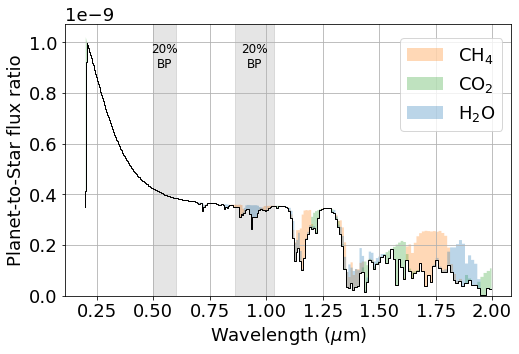

In [51]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[8,5])
fig.patch.set_facecolor("w")

ax.plot(data['all']['wv'],data['all']['flux_ratio'], drawstyle='steps-mid',c='k',lw=1,zorder=500)

for i,sp in enumerate(plot_species):
    ax.fill_between(data[sp]['wv'],data['all']['flux_ratio'],data[sp]['flux_ratio'],lw=0,step='mid',color=colors[i],alpha=.3, label=labels[i])

ax.set_ylim(0,ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0],ax.get_xlim()[1])
ax.set_ylabel('Planet-to-Star flux ratio')
ax.set_xlabel('Wavelength ($\mu$m)')
ax.legend(ncol=1,bbox_to_anchor=(1,0.98),loc='upper right')
ax.grid()

B = 0.20
lam_c = .950
lam_min, lam_max, Dlam = bandpass_extents(B, lam_c)
ax.fill_between([lam_min,lam_max],[0,0],[1,1],color='k',alpha=.1)
ax.fill_between([0.5,0.6],[0,0],[1,1],color='k',alpha=.1)
ax.text(lam_c, 1e-9, '20%\nBP', \
        size = 12, ha='center', va='top',color='k')
ax.text(.55, 1e-9, '20%\nBP', \
        size = 12, ha='center', va='top',color='k')

# plt.savefig('figures/absorbers.pdf',bbox_inches='tight')

plt.show()

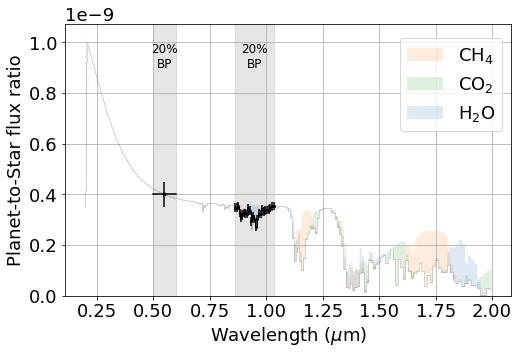

In [48]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[8,5])
fig.patch.set_facecolor("w")

alpha = 0.15
ax.plot(data['all']['wv'],data['all']['flux_ratio'], drawstyle='steps-mid',c='k',lw=1,zorder=500,alpha=alpha)
for i,sp in enumerate(plot_species):
    ax.fill_between(data[sp]['wv'],data['all']['flux_ratio'],data[sp]['flux_ratio'],lw=0,step='mid',color=colors[i],alpha=alpha, label=labels[i])

ax.set_ylim(0,ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0],ax.get_xlim()[1])
ax.set_ylabel('Planet-to-Star flux ratio')
ax.set_xlabel('Wavelength ($\mu$m)')
ax.legend(ncol=1,bbox_to_anchor=(1,0.98),loc='upper right')
ax.grid()

ax.fill_between([lam_min,lam_max],[0,0],[1,1],color='k',alpha=.1)
ax.fill_between([0.5,0.6],[0,0],[1,1],color='k',alpha=.1)
ax.text(lam_c, 1e-9, '20%\nBP', \
        size = 12, ha='center', va='top',color='k')
ax.text(.55, 1e-9, '20%\nBP', \
        size = 12, ha='center', va='top',color='k')


# error bars
ax.plot([noise['wv'][0]-noise['dwv'][0],noise['wv'][0]+noise['dwv'][0]]\
        ,[noise['data'][0],noise['data'][0]],c='k')
ax.errorbar(noise['wv'][:1],noise['data'][:1],noise['uncertainty'][:1],c='k',ms=3,fmt='o',drawstyle='steps-mid')

ax.plot(noise['wv'][2:],noise['flux_ratio'][2:], drawstyle='steps-mid',c='k',lw=1,zorder=500)
ax.errorbar(noise['wv'][2:],noise['data'][2:],noise['uncertainty'][2:],c='k',ms=2,fmt='o',drawstyle='steps-mid')

# plt.savefig('figures/noise_example.pdf',bbox_inches='tight')

plt.show()

[0.5, 0.6000000000000001]

0.04999999999999999